## Stores

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
df = pd.read_csv(".//static//csv//Stores.csv")
print(df.columns)

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')


**Бизнес цели:**

1. Оптимизация ассортимента товаров в магазине. Повысить эффективность продаж за счет оптимального количества доступных товаров, чтобы избежать дефицита или излишков на складе.
2. Увеличение посещаемости магазинов. Повысить среднее количество клиентов в день для увеличения выручки и конкурентоспособности магазина.

**Цели технического проекта:**

Разработать прогнозный анализ спроса с использованием данных о доступных товарах и продажах для определения оптимального количества товаров в магазине.

Провести корреляционный анализ между посещаемостью, площадью магазина и продажами, чтобы выявить факторы, влияющие на увеличение числа посетителей.


**Подготовка данных:**

In [40]:
# Очистка данных: проверка пропусков и выбросов
print(df.isnull().sum())  # Проверка на пропущенные значения
# Заполнение пропусков медианой (если есть)
df.fillna(df.median(), inplace=True)

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64


**Выполнить разбиение каждого набора данных на обучающую, контрольную итестовую выборки для устранения проблемы просачивания данных:**

In [41]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", len(train_data))
print("Размер контрольной выборки:", len(val_data))
print("Размер тестовой выборки:", len(test_data))

Размер обучающей выборки: 572
Размер контрольной выборки: 144
Размер тестовой выборки: 180


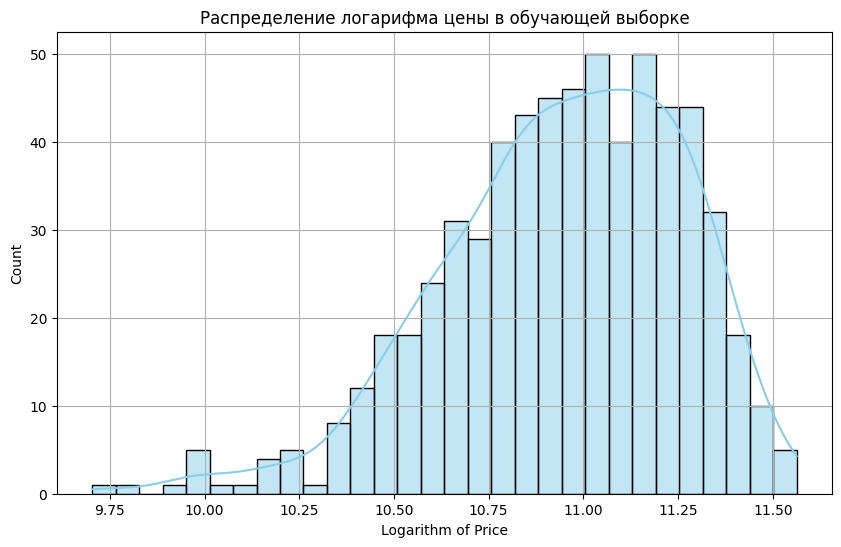

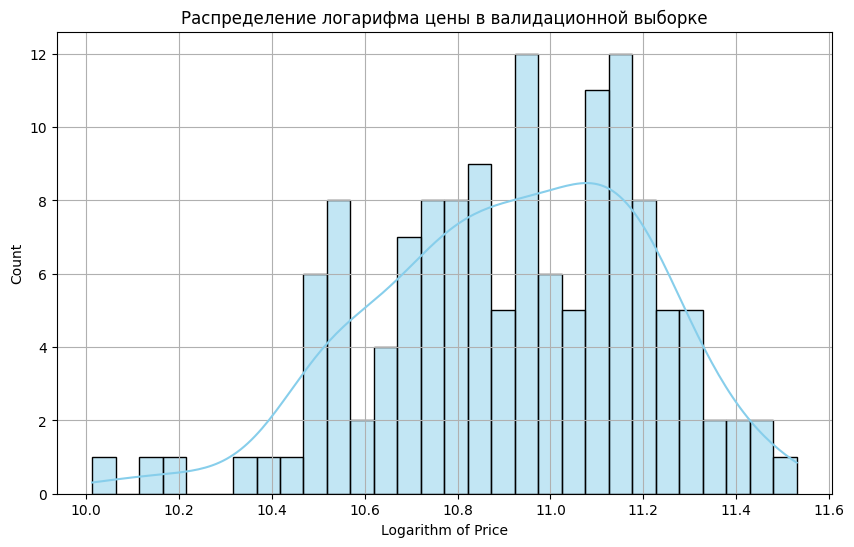

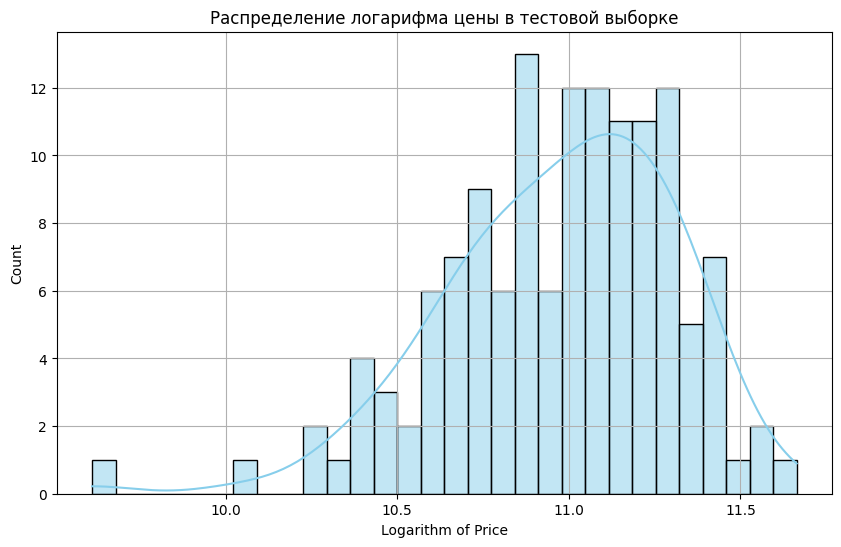

Статистические показатели для обучающей выборки:
Среднее значение: 10.95
Стандартное отклонение: 0.31
Минимальное значение: 9.70
Максимальное значение: 11.56
Количество наблюдений: 627

Статистические показатели для валидационной выборки:
Среднее значение: 10.92
Стандартное отклонение: 0.29
Минимальное значение: 10.01
Максимальное значение: 11.53
Количество наблюдений: 134

Статистические показатели для тестовой выборки:
Среднее значение: 10.97
Стандартное отклонение: 0.33
Минимальное значение: 9.61
Максимальное значение: 11.66
Количество наблюдений: 135



In [42]:
df['store_sales_log'] = np.log(df['Store_Sales'])

X = df.drop(['Store_Sales', 'store_sales_log'], axis=1) 
y = df['store_sales_log']  

X = X.select_dtypes(include='number')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def plot_distribution(data, title):
    """Построение гистограммы распределения целевого признака"""
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='skyblue')
    plt.title(title)
    plt.xlabel('Logarithm of Price')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

plot_distribution(y_train, 'Распределение логарифма цены в обучающей выборке')
plot_distribution(y_val, 'Распределение логарифма цены в валидационной выборке')
plot_distribution(y_test, 'Распределение логарифма цены в тестовой выборке')

def get_statistics(df, name):
    print(f"Статистические показатели для {name} выборки:")
    print(f"Среднее значение: {df.mean():.2f}")
    print(f"Стандартное отклонение: {df.std():.2f}")
    print(f"Минимальное значение: {df.min():.2f}")
    print(f"Максимальное значение: {df.max():.2f}")
    print(f"Количество наблюдений: {df.count()}\n")

get_statistics(y_train, "обучающей")
get_statistics(y_val, "валидационной")
get_statistics(y_test, "тестовой")


In [43]:
from imblearn.over_sampling import SMOTE
df['store_sales_log'] = np.log(df['Store_Sales'])

df['store_sales_category'] = pd.qcut(df['store_sales_log'], q=5, labels=[0, 1, 2, 3, 4])

X = df.drop(['Store_Sales', 'store_sales_log', 'store_sales_category'], axis=1)
y = df['store_sales_category']
X = pd.get_dummies(X, drop_first=True)
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE (oversampling):")
print(pd.Series(y_train_smote).value_counts())


Распределение классов после SMOTE (oversampling):
store_sales_category
0    129
1    129
2    129
3    129
4    129
Name: count, dtype: int64


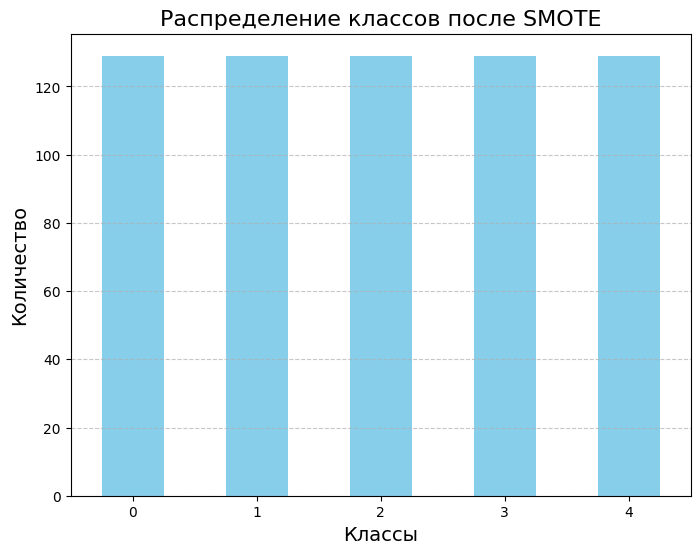

In [44]:
plt.figure(figsize=(8, 6))
pd.Series(y_train_smote).value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Распределение классов после SMOTE', fontsize=16)
plt.xlabel('Классы', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=0)  # Оставляем метки классов горизонтальными
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

На графике видно, что распределение классов после применения SMOTE стало полностью сбалансированным: все 5 классов имеют одинаковое количество выборок. Это говорит о том, что проблема несбалансированности классов успешно решена.

Исходные данные: (896, 7) Store ID                   int64
Store_Area                 int64
Items_Available            int64
Daily_Customer_Count       int64
Store_Sales                int64
store_sales_log          float64
store_sales_category    category
dtype: object
После OneHotEncoder: (896, 7) Store ID                   int64
Store_Area                 int64
Items_Available            int64
Daily_Customer_Count       int64
Store_Sales                int64
store_sales_log          float64
store_sales_category    category
dtype: object
После дискретизации: (896, 13) Store ID                       int64
Store_Area                     int64
Items_Available                int64
Daily_Customer_Count           int64
Store_Sales                    int64
store_sales_log              float64
store_sales_category        category
Store ID _bin                float64
Store_Area_bin               float64
Items_Available_bin          float64
Daily_Customer_Count_bin     float64
Store_Sales_bin 

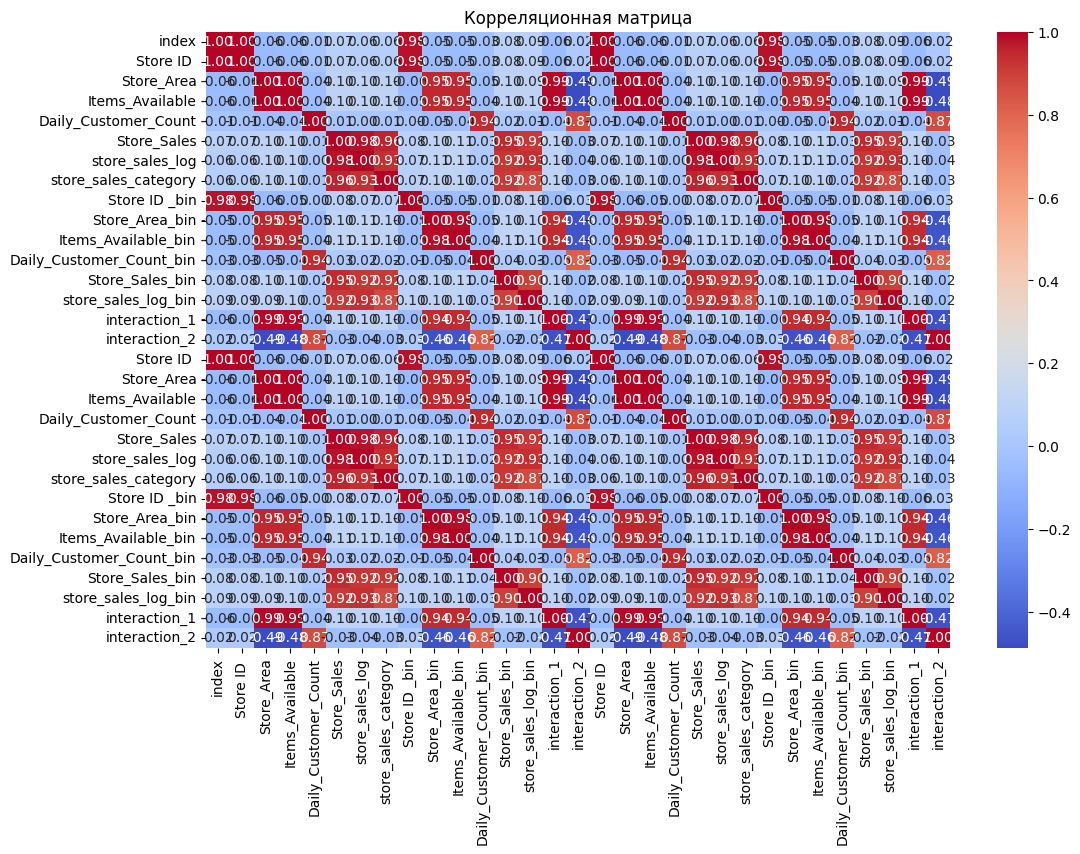

Пропуски в данных:
 Series([], dtype: int64)

Проверка на уникальность значений в 'index': True


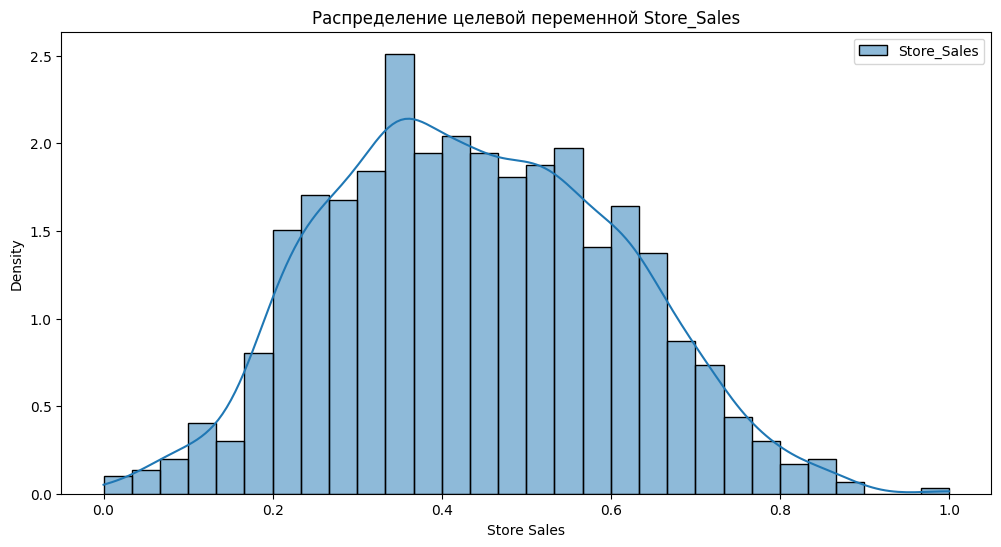

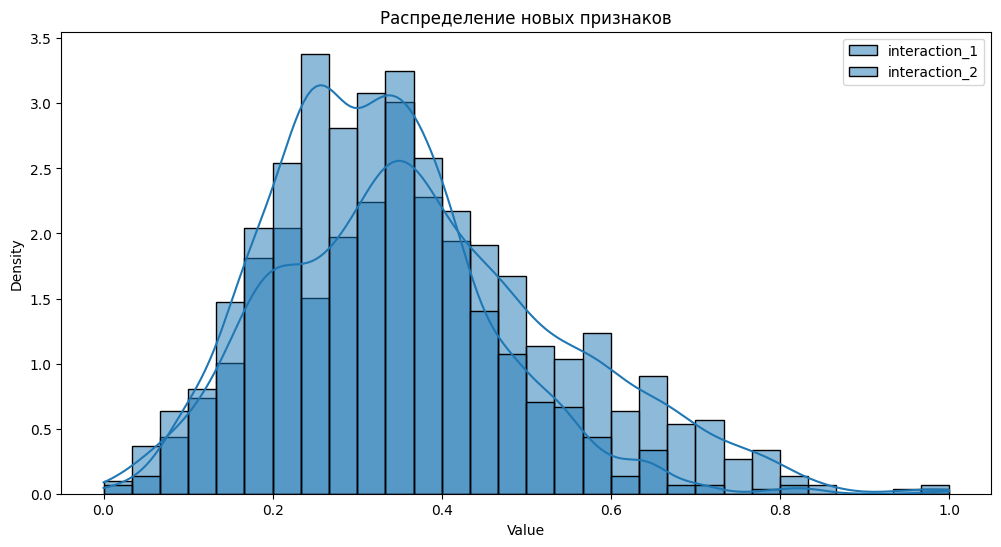

In [45]:
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time
import featuretools as ft


print("Исходные данные:", df.shape, df.dtypes)

# Обработка категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_cols])

# Преобразуем в DataFrame и объединяем с исходным
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)
print("После OneHotEncoder:", df.shape, df.dtypes)

# Дискретизация числовых столбцов
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretized_data = discretizer.fit_transform(df[numeric_cols])

# Преобразуем в DataFrame и объединяем с исходным
discretized_df = pd.DataFrame(discretized_data, columns=[f"{col}_bin" for col in numeric_cols])
df = pd.concat([df, discretized_df], axis=1)
print("После дискретизации:", df.shape, df.dtypes)

# Синтез новых признаков
df['interaction_1'] = df['Store_Area'] * df['Items_Available']
df['interaction_2'] = df['Daily_Customer_Count'] / (df['Store_Area'] + 1)  # Избегаем деления на 0
print("После синтеза новых признаков:", df.shape, df.dtypes)

# Применяем стандартизацию и нормализацию
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standard = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)
df = df_minmax
print("После нормализации:", df.shape, df.dtypes)

# Создаем сущность в Featuretools
es = ft.EntitySet(id="store_data")

# Добавляем таблицу данных как сущность
df = df.reset_index()  # Сброс индекса и создание 'id'
es = es.add_dataframe(dataframe_name="stores", dataframe=df, index="index")

# Генерация новых признаков с помощью Featuretools
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="stores", max_depth=1)
print("После генерации признаков Featuretools:", feature_matrix.shape, feature_defs)

# Объединяем новые признаки с исходными
df = pd.concat([df, feature_matrix], axis=1)

# Оценка качества признаков
def evaluate_predictive_power(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Предсказательная способность:\nMSE: {mse:.2f}, R²: {r2:.2f}\n")
    return mse, r2

def measure_computation_time(X_train, y_train):
    model = LinearRegression()
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    print(f"Время вычисления для обучения модели: {elapsed_time:.4f} секунд\n")

def check_reliability(X, y):
    model = LinearRegression()
    reliability_scores = []
    for _ in range(10):  # 10 случайных разбиений
        X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=None)
        model.fit(X_train_sub, y_train_sub)
        y_pred_sub = model.predict(X_test_sub)
        r2_sub = r2_score(y_test_sub, y_pred_sub)
        reliability_scores.append(r2_sub)
    
    print(f"Надежность (R² для 10 разбиений): {np.mean(reliability_scores):.2f} ± {np.std(reliability_scores):.2f}\n")

def check_correlation(df):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Корреляционная матрица")
    plt.show()

def check_integrity(df):
    missing_values = df.isnull().sum()
    print("Пропуски в данных:\n", missing_values[missing_values > 0])
    print("\nПроверка на уникальность значений в 'index':", df['index'].is_unique)

# Разделение на признаки и целевую переменную
X = df.drop(['Store_Sales'], axis=1, errors='ignore')
y = df['Store_Sales']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Выполнение оценок
evaluate_predictive_power(X_train, y_train, X_test, y_test)
measure_computation_time(X_train, y_train)
check_reliability(X, y)
check_correlation(df)
check_integrity(df)

# Визуализация распределения целевой переменной (если есть)
if 'Store_Sales' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Store_Sales'], color='blue', kde=True, stat='density', bins=30)
    plt.title("Распределение целевой переменной Store_Sales")
    plt.xlabel("Store Sales")
    plt.ylabel("Density")
    plt.show()
else:
    print("Столбец 'Store_Sales' не найден в DataFrame.")

# Визуализация новых признаков (пример)
if 'interaction_1' in df.columns and 'interaction_2' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['interaction_1'], color='orange', kde=True, stat='density', bins=30, label='interaction_1')
    sns.histplot(df['interaction_2'], color='green', kde=True, stat='density', bins=30, label='interaction_2')
    plt.title("Распределение новых признаков")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
else:
    print("Одного или нескольких новых признаков не найдено в DataFrame.")

**Оценить качество каждого набора признаков:**

Предсказательная способность: Хорошая, особенно после дискретизации. Однако необходимо внимательно следить за переобучением.

Cкорость вычисления: 0.0209 секунд.
Время вычисления достаточно короткое, что является положительным признаком, особенно при больших объемах данных. Это указывает на то, что процесс обработки данных эффективен.

Надежность: R² для 10 разбиений: 0.98 ± 0.00. Очень высокая надежность (близкая к 1) указывает на то, что модель может хорошо предсказывать значения целевой переменной Store_Sales. Однако такая высокая оценка может также указывать на возможность переобучения, особенно если данные хорошо известны модели.

Целостность: Данные чистые, без пропусков или дубликатов, что положительно влияет на качество модели.

Корреляция: 

1. Параметры, такие как Store_Sales, store_sales_log, и store_sales_category, имеют очень высокую корреляцию между собой. Это говорит о том, что эти показатели связаны и изменяются почти одинаково. Например, рост объема продаж (Store_Sales) связан с ростом значений логарифма продаж (store_sales_log) и категории продаж (store_sales_category).

2. Некоторые параметры, такие как количество клиентов в день (Daily_Customer_Count) и площадь магазина (Store_Area), имеют низкую корреляцию с другими переменными, что может свидетельствовать о слабой связи между этими показателями.


